In [ ]:
import os
from pathlib import Path
from ScaleDetection.src.classifier import ScaleBarClassifier
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
# 1. Initialize the model
clf = ScaleBarClassifier()

# 2. Load or compute embeddings from your reference folders
clf.load_or_compute_known_embeddings("atypical_examples")

results = {}
# 3. Classify a new image (e.g. extracted bottom region from your full microscope image)
for filename in os.listdir("data/classifier_test"):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = Path("data/classifier_test") / filename
        result = clf.classify_image(str(image_path))
        results[filename] = result['scores']
        print(f"{filename} -> {result}")
        # Plot the image
        image = plt.imread(image_path)

Computing embeddings for graduation_middleunit...
Processing atypical_examples/graduation_middleunit/BIOUG84663-G11.cbc0e20f.jpg...
Processing atypical_examples/graduation_middleunit/BIOUG84644-D08.81cc1824.jpg...
Processing atypical_examples/graduation_middleunit/BIOUG84663-G11.d7871f7e.jpg...
Processing atypical_examples/graduation_middleunit/BIOUG84663-G11.e9b1be6c.jpg...
Processing atypical_examples/graduation_middleunit/BIOUG84663-G11.9b123161.jpg...
Processing atypical_examples/graduation_middleunit/BIOUG84663-G11.dc08a39f.jpg...
Processing atypical_examples/graduation_middleunit/BIOUG84663-G11.47cc2955.jpg...
Computing embeddings for ruler_photo...
Processing atypical_examples/ruler_photo/r10.jpg...
Processing atypical_examples/ruler_photo/r11.jpg...
Processing atypical_examples/ruler_photo/r12.jpg...
Processing atypical_examples/ruler_photo/r2.jpg...
Processing atypical_examples/ruler_photo/r3.jpg...
Processing atypical_examples/ruler_photo/r1.jpg...
Processing atypical_example

In [97]:
import pandas as pd
df = pd.DataFrame(results).T
df['type'] = [
    'ruler_photo', 'ruler_photo', 'graduation_middleunit', 'normal', 'graduation_middleunit', 'ruler_photo', 'graduation_middleunit', 
    'graduation_middleunit', 'graduation_middleunit', 'graduation_middleunit', 'normal', 'graduation_middleunit'
]
df

,graduation_middleunit,ruler_photo,type
BIOUG85754-C04.a85fdd1e.jpg,0.292055,0.421703,ruler_photo
BIOUG85754-A12.3b8e9942.jpg,0.341453,0.471707,ruler_photo
BIOUG84663-G11.cbc0e20f.jpg,0.532212,0.349801,graduation_middleunit
NSWHA1668-23.jpg,0.299253,0.277335,normal
BIOUG84644-D08.81cc1824.jpg,0.459749,0.322134,graduation_middleunit
BIOUG85755-H07.7b911bc5.jpg,0.382357,0.457401,ruler_photo
BIOUG84663-G11.d7871f7e.jpg,0.539116,0.361243,graduation_middleunit
BIOUG84663-G11.e9b1be6c.jpg,0.543820,0.355652,graduation_middleunit
BIOUG84663-G11.9b123161.jpg,0.443116,0.267879,graduation_middleunit
BIOUG84663-G11.dc08a39f.jpg,0.420540,0.255523,graduation_middleunit


,type,predicted_category,score
0,ruler_photo,graduation_middleunit,0.292055
1,ruler_photo,graduation_middleunit,0.341453
2,graduation_middleunit,graduation_middleunit,0.532212
3,normal,graduation_middleunit,0.299253
4,graduation_middleunit,graduation_middleunit,0.459749
5,ruler_photo,graduation_middleunit,0.382357
6,graduation_middleunit,graduation_middleunit,0.539116
7,graduation_middleunit,graduation_middleunit,0.543820
8,graduation_middleunit,graduation_middleunit,0.443116
9,graduation_middleunit,graduation_middleunit,0.420540


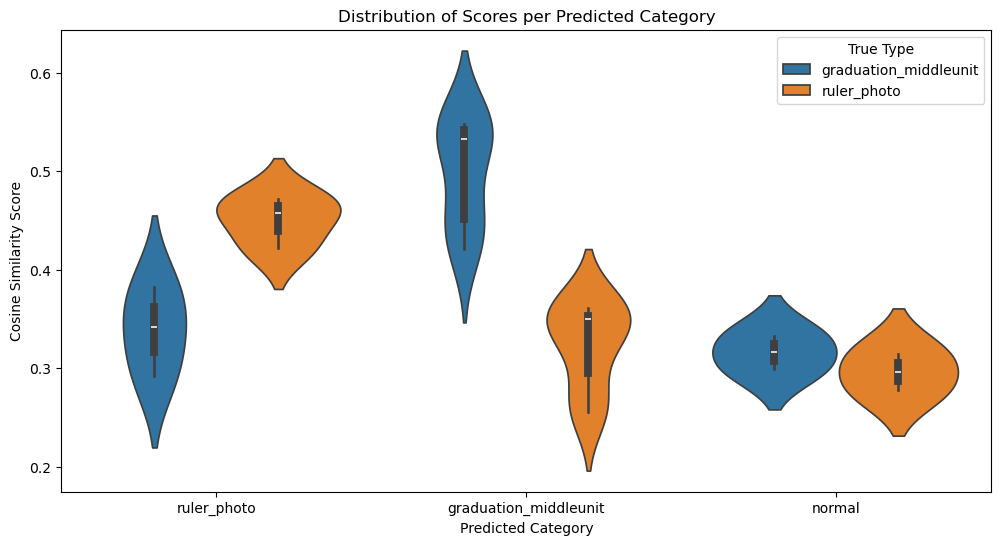

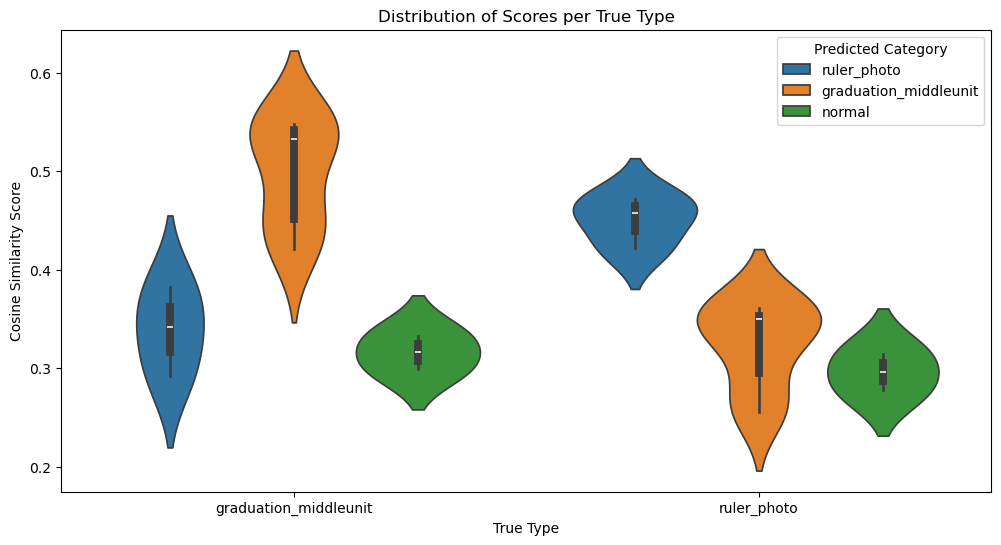

In [98]:
# Plot distribution of scores per class
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_flat = df.melt(id_vars=['type'], var_name='predicted_category', value_name='score')
display(df_flat)
plt.figure(figsize=(12, 6))
sns.violinplot(x='type', y='score', hue='predicted_category', data=df_flat)
plt.title('Distribution of Scores per Predicted Category')
plt.ylabel('Cosine Similarity Score')
plt.xlabel('Predicted Category')
plt.legend(title='True Type')
plt.show()
plt.figure(figsize=(12, 6))
sns.violinplot(x='predicted_category', y='score', hue='type', data=df_flat)
plt.title('Distribution of Scores per True Type')
plt.ylabel('Cosine Similarity Score')
plt.xlabel('True Type')
plt.legend(title='Predicted Category')
plt.show()

In [103]:
df

,graduation_middleunit,ruler_photo,type
BIOUG85754-C04.a85fdd1e.jpg,0.292055,0.421703,ruler_photo
BIOUG85754-A12.3b8e9942.jpg,0.341453,0.471707,ruler_photo
BIOUG84663-G11.cbc0e20f.jpg,0.532212,0.349801,graduation_middleunit
NSWHA1668-23.jpg,0.299253,0.277335,normal
BIOUG84644-D08.81cc1824.jpg,0.459749,0.322134,graduation_middleunit
BIOUG85755-H07.7b911bc5.jpg,0.382357,0.457401,ruler_photo
BIOUG84663-G11.d7871f7e.jpg,0.539116,0.361243,graduation_middleunit
BIOUG84663-G11.e9b1be6c.jpg,0.543820,0.355652,graduation_middleunit
BIOUG84663-G11.9b123161.jpg,0.443116,0.267879,graduation_middleunit
BIOUG84663-G11.dc08a39f.jpg,0.420540,0.255523,graduation_middleunit


In [104]:
# Compute the optimal threshold for each category
from sklearn.metrics import roc_curve, auc

thresholds = {}
for category in df['type'].unique():
    if category == 'normal':
        continue
    y_true = (df['type'] == category).astype(int)
    y_scores = df[category]
    fpr, tpr, thresh = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresh[optimal_idx]
    thresholds[category] = {
        'optimal_threshold': optimal_threshold,
        'roc_auc': roc_auc
    }

In [105]:
thresholds

{'ruler_photo': {'optimal_threshold': 0.4217032194137573, 'roc_auc': 1.0},
 'graduation_middleunit': {'optimal_threshold': 0.4205400347709656,
  'roc_auc': 1.0}}

In [123]:
# Test the previously computed thresholds
test_results = {}
for filename in os.listdir("data/classifier_test"):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        image_path = Path("data/classifier_test") / filename
        result = clf.classify_image(str(image_path))
        scores = result['scores']
        predictions = 'normal'
        for category, score in scores.items():
            if category in thresholds and score >= 0.40 : #thresholds[category]['optimal_threshold']:
                predictions = category
                break
        test_results[filename] = {
            'true_type': df.loc[filename, 'type'],
            'predicted_type': predictions,
            'scores': scores
        }
test_results

{'BIOUG85754-C04.a85fdd1e.jpg': {'true_type': 'ruler_photo',
  'predicted_type': 'ruler_photo',
  'scores': {'graduation_middleunit': 0.29205530881881714,
   'ruler_photo': 0.4217032194137573}},
 'BIOUG85754-A12.3b8e9942.jpg': {'true_type': 'ruler_photo',
  'predicted_type': 'ruler_photo',
  'scores': {'graduation_middleunit': 0.34145259857177734,
   'ruler_photo': 0.4717065393924713}},
 'BIOUG84663-G11.cbc0e20f.jpg': {'true_type': 'graduation_middleunit',
  'predicted_type': 'graduation_middleunit',
  'scores': {'graduation_middleunit': 0.5322123169898987,
   'ruler_photo': 0.34980106353759766}},
 'NSWHA1668-23.jpg': {'true_type': 'normal',
  'predicted_type': 'normal',
  'scores': {'graduation_middleunit': 0.2992534637451172,
   'ruler_photo': 0.2773353159427643}},
 'BIOUG84644-D08.81cc1824.jpg': {'true_type': 'graduation_middleunit',
  'predicted_type': 'graduation_middleunit',
  'scores': {'graduation_middleunit': 0.45974892377853394,
   'ruler_photo': 0.3221338987350464}},
 'BIOUG

In [124]:
test_results = pd.DataFrame(test_results).T
test_results

,true_type,predicted_type,scores
BIOUG85754-C04.a85fdd1e.jpg,ruler_photo,ruler_photo,"{'graduation_middleunit': 0.29205530881881714,..."
BIOUG85754-A12.3b8e9942.jpg,ruler_photo,ruler_photo,"{'graduation_middleunit': 0.34145259857177734,..."
BIOUG84663-G11.cbc0e20f.jpg,graduation_middleunit,graduation_middleunit,"{'graduation_middleunit': 0.5322123169898987, ..."
NSWHA1668-23.jpg,normal,normal,"{'graduation_middleunit': 0.2992534637451172, ..."
BIOUG84644-D08.81cc1824.jpg,graduation_middleunit,graduation_middleunit,"{'graduation_middleunit': 0.45974892377853394,..."
BIOUG85755-H07.7b911bc5.jpg,ruler_photo,ruler_photo,"{'graduation_middleunit': 0.3823571801185608, ..."
BIOUG84663-G11.d7871f7e.jpg,graduation_middleunit,graduation_middleunit,"{'graduation_middleunit': 0.5391155481338501, ..."
BIOUG84663-G11.e9b1be6c.jpg,graduation_middleunit,graduation_middleunit,"{'graduation_middleunit': 0.5438198447227478, ..."
BIOUG84663-G11.9b123161.jpg,graduation_middleunit,graduation_middleunit,"{'graduation_middleunit': 0.4431156814098358, ..."
BIOUG84663-G11.dc08a39f.jpg,graduation_middleunit,graduation_middleunit,"{'graduation_middleunit': 0.4205400347709656, ..."
